# PREDICTICTION USING SUPRERVISED ML

INTRODUCTION: Regression is the process of estimating the relationship between variables by fitting a mathematical model to observable data. It explains how changes in one variable are related to changes in another. The goal is to develop a model that can predict the value of the dependent variable based on the values of the independent variables. So I would be creating a "Simple Linear Regression". This type of regression involves a single dependent variable and one independent variable. It assumes a linear relationship between the variables and estimates the slope and intercept of the best-fitting line.

PROJECT STATEMENT: A two-variable dataset with the columns "hour" and "score" has been provided to me. In order to establish a connection between the two models and generate predictions for the future, I must build a regression model. 

# Import Important Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Import The CSV File

In [4]:
data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_df = pd.read_csv(data)
student_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Understanding The Data

In [5]:
duplicates = student_df.duplicated()
num_duplicates = duplicates.sum()

print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


In [6]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing The Data

creating a scatter plot between the two variables 

Text(0, 0.5, 'Scores')

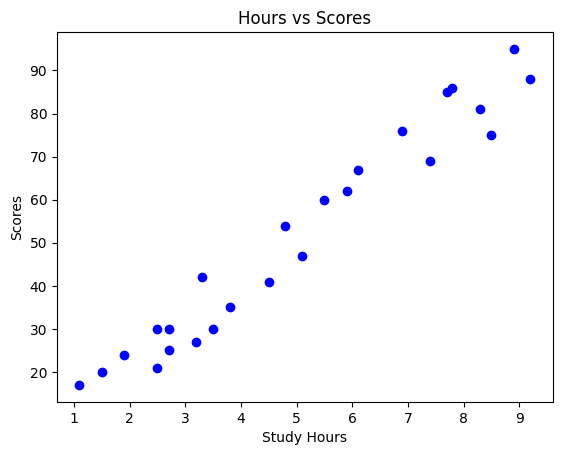

In [8]:
plt.scatter(student_df["Hours"], student_df["Scores"], color='blue')
plt.title("Hours vs Scores")
plt.xlabel("Study Hours")
plt.ylabel("Scores")

From the diagram above, we can see a linear relationship between the variables so it only make sense to create a regression model.

# Data Preparation

Set the "X" and "y" variable for model creation.

In [9]:
X = student_df[['Hours']]
y = student_df['Scores'].astype(float)

Performing the test train split using a test size of 0.2

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2,
                                                    shuffle = True,
                                                    random_state = 0)


print(f"Training set size: {X_train.shape[0]} \n Testing size: {X_test.shape[0]} ")


Training set size: 20 
 Testing size: 5 


# Model Creation

Creating a linear regression model and fitting them to the training data

In [11]:
regression_model =LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regression_model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

To visualize the linear regression model, we can create a scatter plot of the data points along with the regression line.

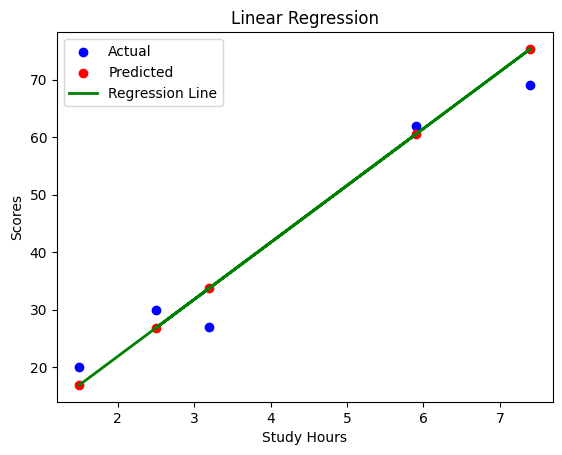

In [14]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')


plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')
plt.legend()
plt.show()

The diagram above show the predicted score(along the Regression Line) and the actual score.

# Assesment Question

To obtain the expected score if the study hour is 9.25

In [21]:
hour = [[9.25]]
expected = regression_model.predict(hour)
print(f"if the study hour is {hour[0][0]}\nwe expecting a score of {expected[0]}")

if the study hour is 9.25
we expecting a score of 93.69173248737535


C:\Users\PAVILION\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Evaluation

Using the evaluation metrics such as mean squared error (MSE) and coefficient of determination (R-squared). 

MSE measures the average of the squared differences between the actual and predicted values. A lower MSE indicates that the model has smaller prediction errors and better performance.

R-squared is a statistical measure that represents the proportion of the variance in the target variable that can be explained by the regression model. It ranges from 0 to 1, with 1 indicating a perfect fit. Higher R-squared values suggest that the model captures a larger proportion of the target variable's variability.



In [20]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 21.598769307217406
R-squared Score: 0.9454906892105355


The obtained R-squared value of 0.95 indicates that approximately 95% of the variance in the dependent variable can be explained by the independent variables in the regression model. This high value implies that the model has a strong explanatory power and is capable of capturing a substantial portion of the variability in the data.